In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

0.9917364514432898


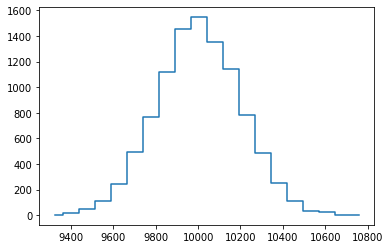

In [11]:
meas = np.full(10000,100)
unc  = np.random.normal (0,1, 10000)
meas = meas+unc

histy, bin_edges = np.histogram(meas, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

def function(ix):#note the norm is for 100 bins over 0-20
    return ix**2
outmeas = np.array(list(map(function, meas)))
histy, bin_edges = np.histogram(outmeas, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
print(unc.std())

In [12]:
print(meas.std(),outmeas.std())

0.9917364514432898 198.36902751833173


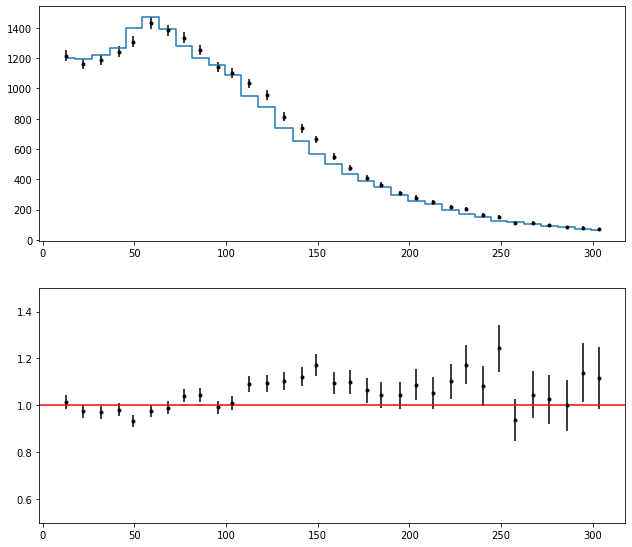

In [38]:
#to do: histogram of dijet mass plot
def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr
    

def load(iName):
    label=iName
    datax=np.array([])
    datay=np.array([])
    datayerr=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            datax    = np.append(datax,float(row[0]))
            datay    = np.append(datay,float(row[1]))
            datayerr = np.append(datayerr,np.sqrt(float(row[1])))
    return datax,datay,datayerr

fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr=load("tmpdata.txt")
simx,simy,simyerr=load("tmpmc.txt")

plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.show()

In [40]:
def shifthist(ixunc,isimy):
    newsimy=np.array([])
    for i0 in range(len(isimy)):
        ynew = isimy[i0]*(1-ixunc)
        if i0 > 1:
            ynew = isimy[i0-1]*ixunc + isimy[i0]*(1-ixunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy


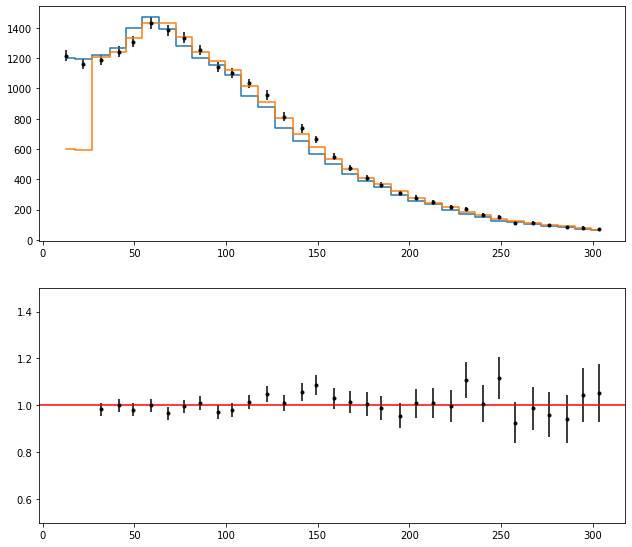

In [42]:
fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
#Shift this by half a bin (note that is very reasonable)
newsimy=shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
plt.plot    (datax,newsimy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.show()

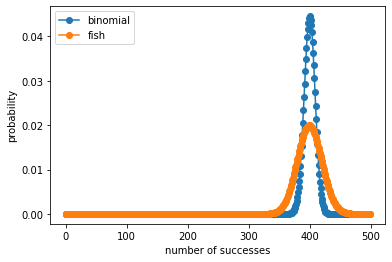

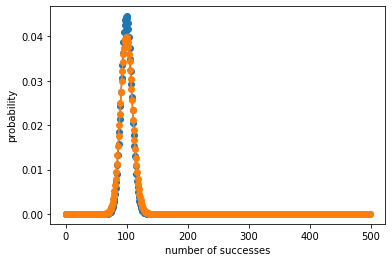

In [24]:
n=500
p=0.8
k=np.arange(0,500)

binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)

plt.plot(k,binomial,'o-',label='binomial')
plt.plot(k,poisson,'o-',label='fish')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend()
plt.show()

#And now one where 
n=500
p=0.2
k=np.arange(0,500)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()


binomial: 0.08030128564591586
poisson: 0.06522913800493721


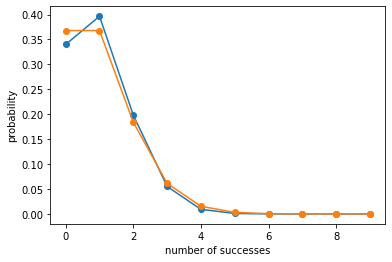

B Mean: 51.999999951448956 Var: 50.1428548141454
P Mean: 51.999999888566 StdDev: 51.9999946511691


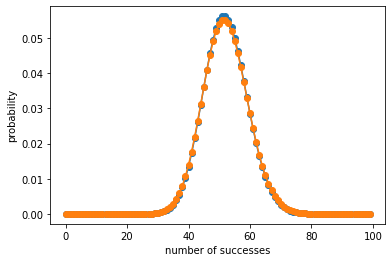

In [26]:
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
total1=0
total2=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= poisson[i0]
        total2+= binomial[i0]
        
print("binomial:",total1)
print("poisson:",total2)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now what about for GWs in a year
n=28*52.
p=1/28.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("B Mean:",average,"Var:",variance)

average  = np.average(k, weights=poisson)
variance = np.average((k-average)**2, weights=poisson)
print("P Mean:",average,"StdDev:",variance)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()
#This last one is a gaussian 

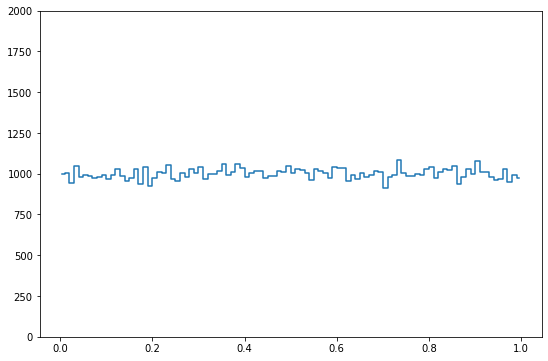

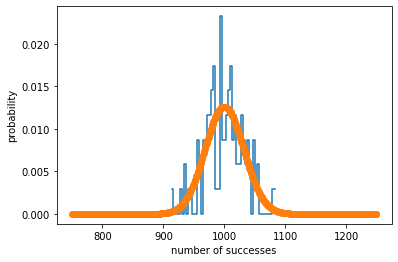

In [27]:
fig, ax = plt.subplots(figsize=(9,6))
N=100000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.show()

#now lets look at the distribution in each bin
histy2, bin_edges2 = np.histogram(histy, bins=50)
bin_centers2 = 0.5*(bin_edges2[1:] + bin_edges2[:-1])
plt.plot(bin_centers2,histy2/np.sum(histy2)/(bin_edges2[10]-bin_edges2[9]),drawstyle = 'steps-mid')

lamb=N/nbins
k=np.arange(0.75*N/nbins,1.25*N/nbins)
poisson=stats.poisson.pmf(k,lamb)
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

<ErrorbarContainer object of 3 artists>

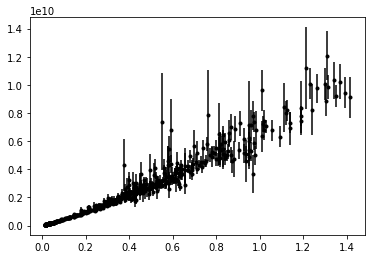

In [30]:
#Today we are going to start with astro data from here : 
#http://supernova.lbl.gov/Union/
#Lets load the data
import math
label='sn_z_mu_dmu_plow_union2.1.txt'

#Table stores name, redshift, distance modulus, distance modulus error
#Lets convert from distance modulus to distance
#See here https://en.wikipedia.org/wiki/Distance_modulus
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=[]
distance=[]
distance_err=[]
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        redshift.append(float(row[1]))
        distance.append(distanceconv(float(row[2])))
        distance_err.append(distanceconverr(float(row[2]),float(row[3])))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

<ErrorbarContainer object of 3 artists>

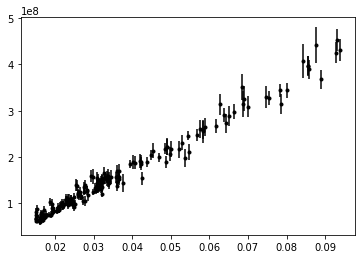

In [31]:
#Now lets zoom in on the small redshift data
redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        if float(row[1]) > 0.1:
            continue
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

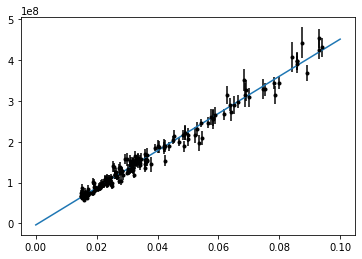

Hubbles Constant: 65.87381819553848 +/- 0.722443335496389 intercept -3931446.778206587 +/- 2047227.7501262664


In [32]:
#Lets fit this to a linear function by hand
#from the derivation we have 
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()
#Now to compute the uncertainty

residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid**2)
slopeunc=np.sum(residuals)/(len(redshift)-2)*1./variance(redshift)*1./len(redshift)
shiftunc=slopeunc*(redshift.mean())**2+np.sum(residuals)/(len(redshift)-2)/len(redshift)
print("Hubbles Constant:",1e6*3e5/slope,"+/-",1e6*3e5*math.sqrt(slopeunc)/slope/slope,"intercept",const,"+/-",math.sqrt(shiftunc))#Note 1e6 is from pc to Mpc and 3e5 is c in km/s

